In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train= pd.read_csv("../input/train.csv")
test =pd.read_csv("../input/test.csv")

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [6]:
print("Train : "+str(train.shape))

#checking for duplicates
idUn = len(set(train.Id))
idTo = train.shape[0]
idDup = idTo - idUn
print(str(idDup)+" duplicates available in this dataset")

Train : (1460, 81)
0 duplicates available in this dataset


In [7]:
train_ID = train['Id']
test_ID = test['Id']

#Delete the ID Column
train.drop('Id',axis=1,inplace = True)
test.drop('Id', axis=1, inplace = True)

#After dropping Id Column
print("Train Data: "+str(train.shape))
print("Test Data: "+str(test.shape))

Train Data: (1460, 80)
Test Data: (1459, 79)


In [8]:
#Select the Numerical & Categorical Features

numerical_features = train.select_dtypes(exclude = ['object']).columns
categorical_features = train.select_dtypes(include = ['object']).columns

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


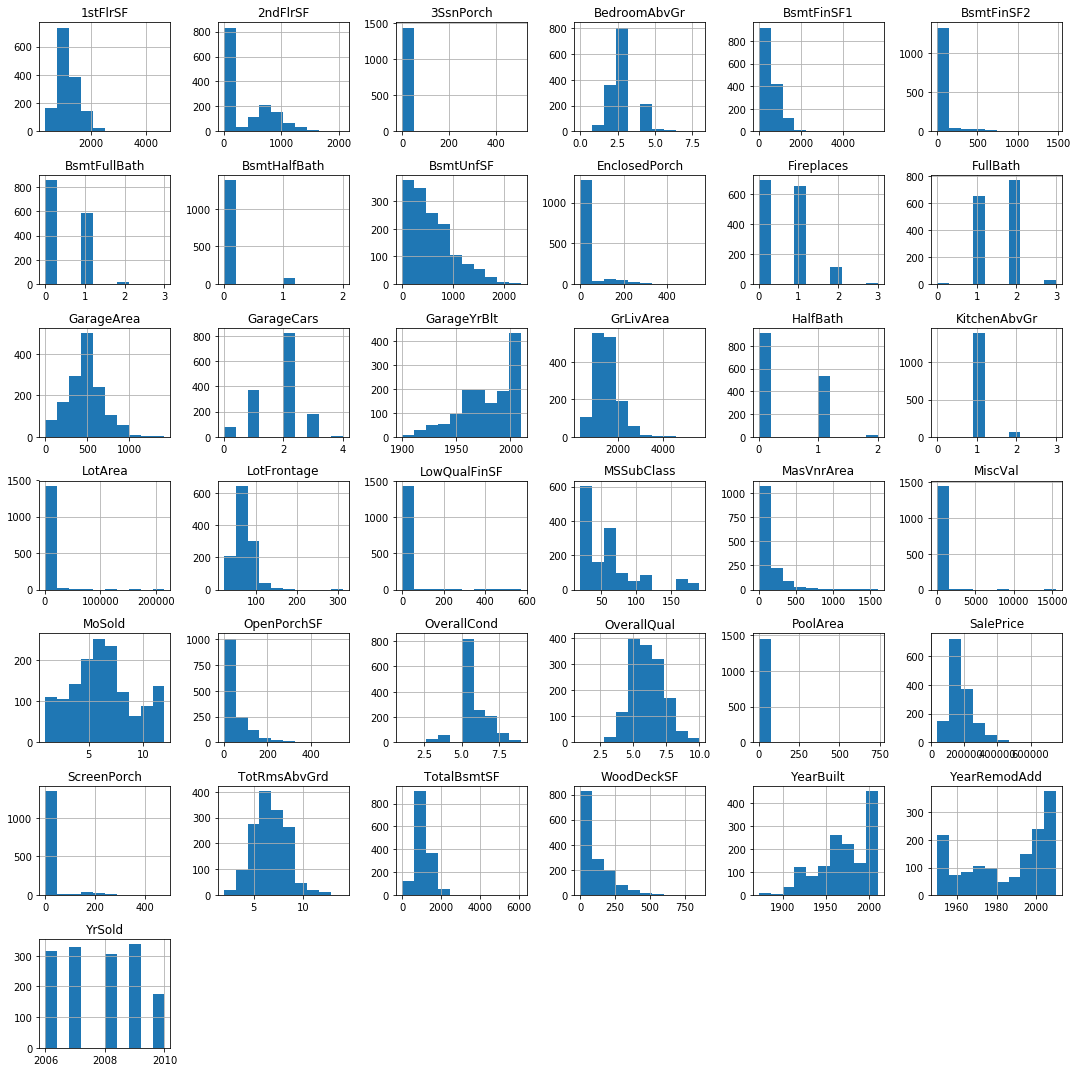

In [9]:
# Plotting the numerical columns
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train[numerical_features].hist(ax=ax)
fig.tight_layout()
fig.show()


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


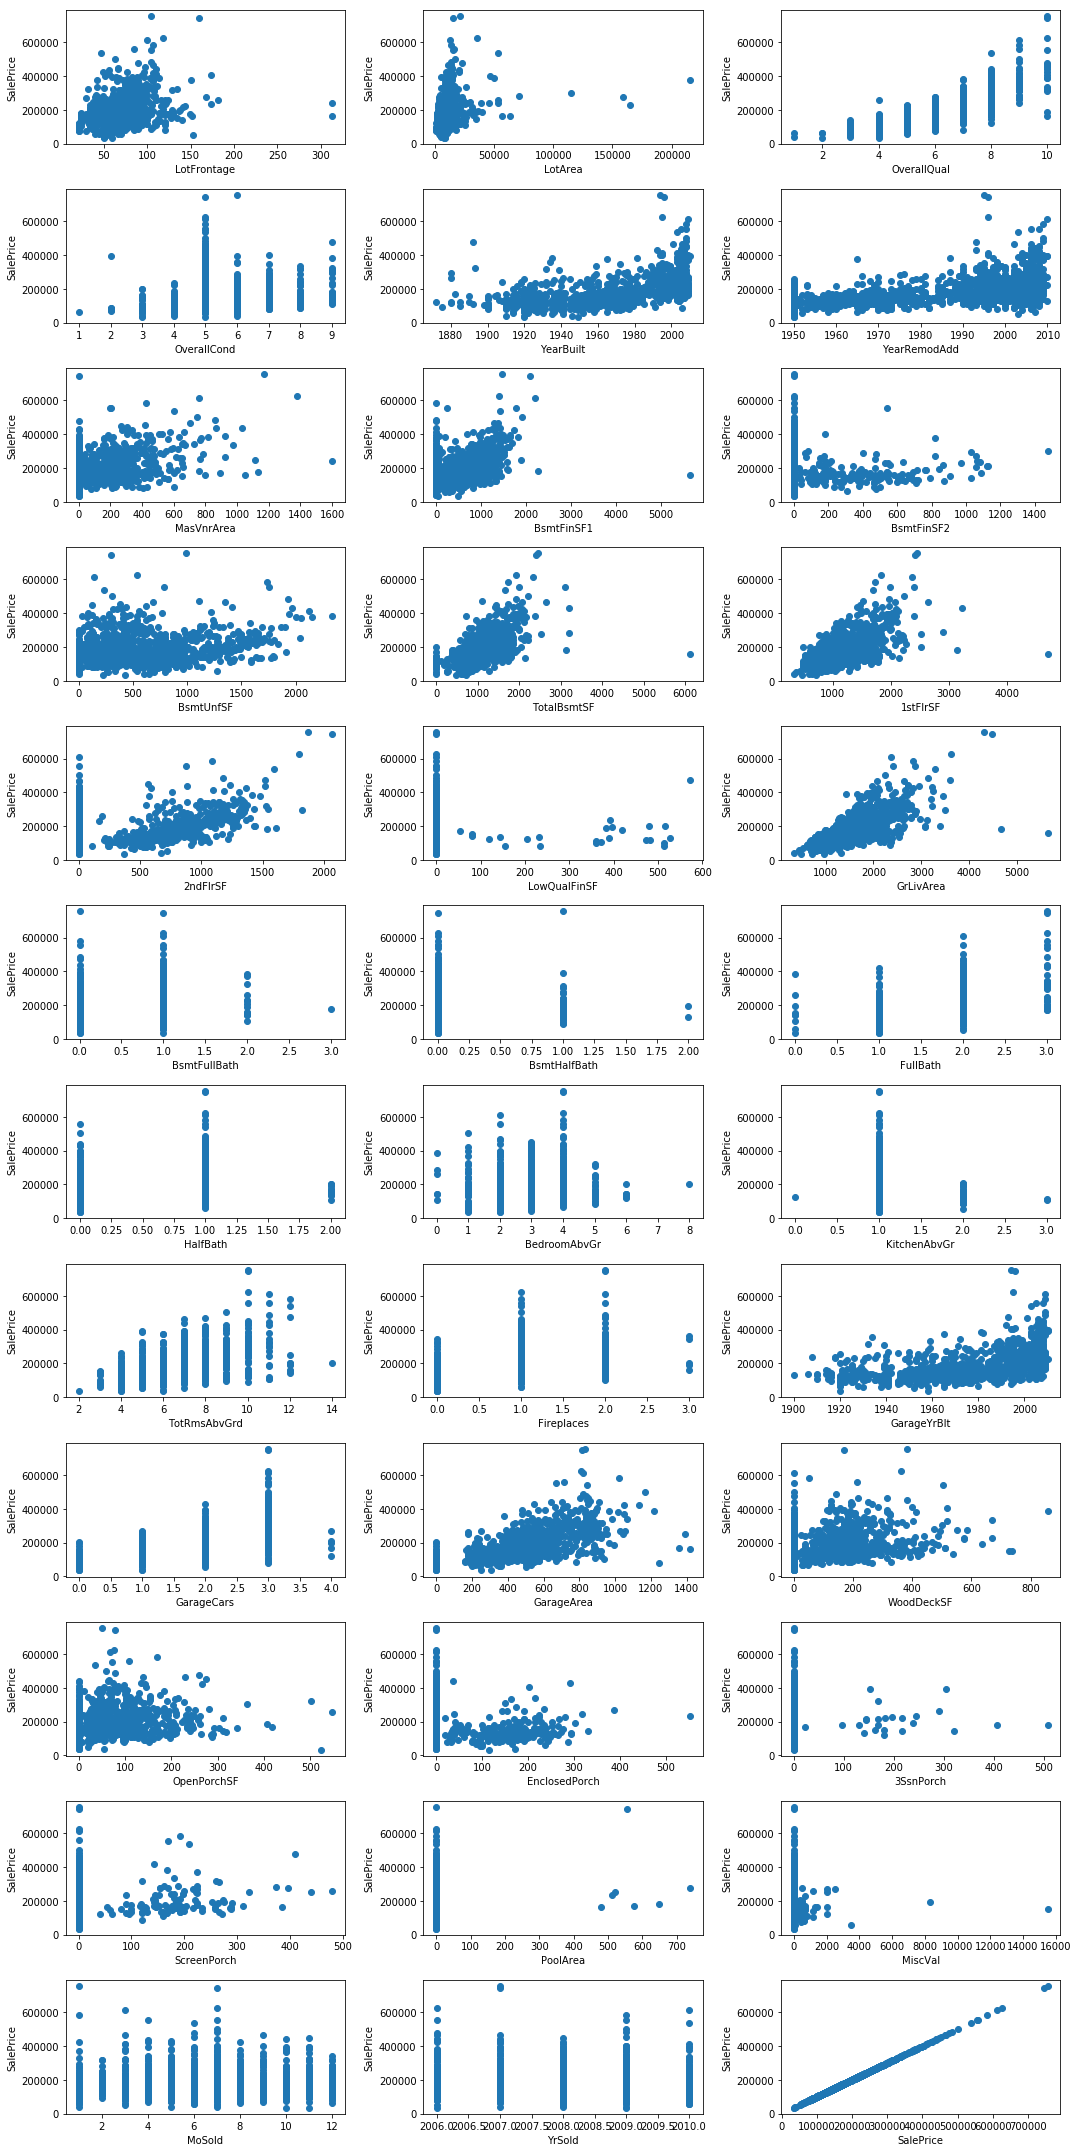

In [10]:
#plot the Numeric columns against SalePrice Using ScatterPlot

fig = plt.figure(figsize=(15,30))
for i,col in enumerate(numerical_features[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(train[col], train['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show()

## Use bar plots to plot categorical features against SalePrice

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


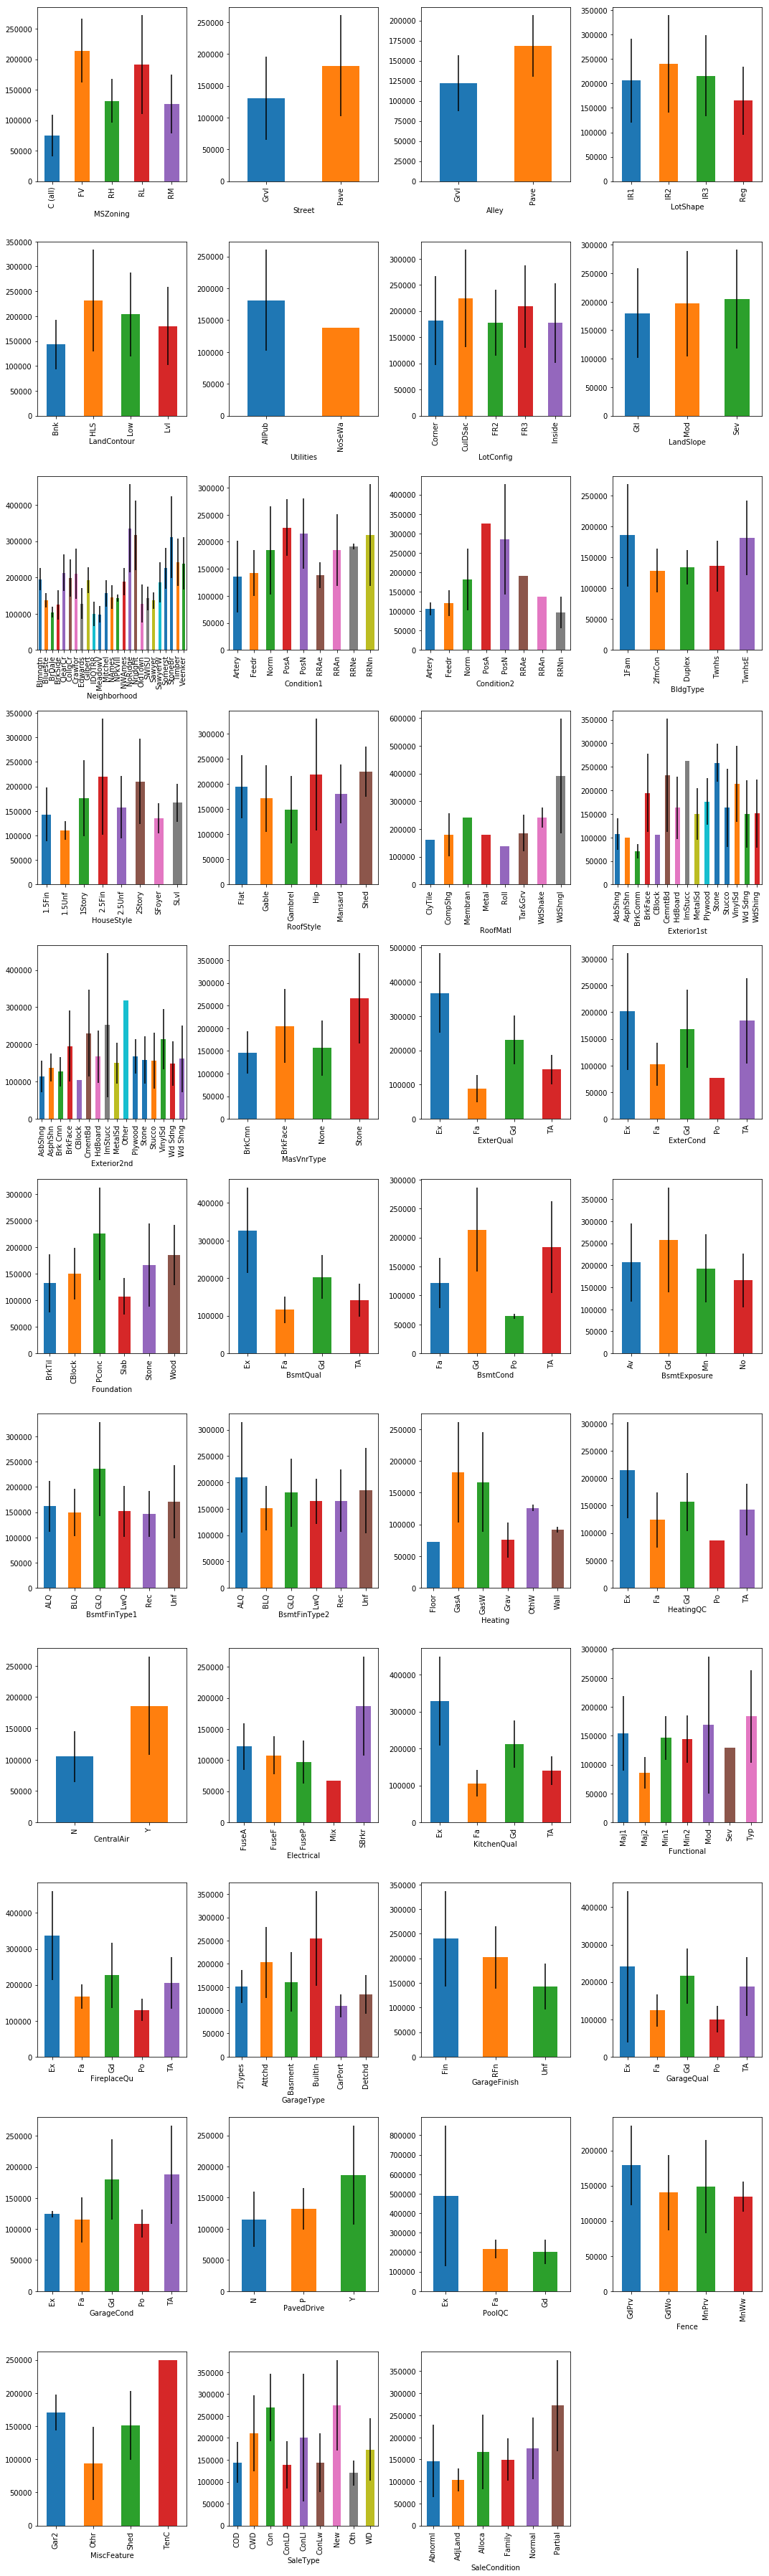

In [11]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_features):
    fig.add_subplot(11,4,1+i)
    train.groupby(col).mean()['SalePrice'].plot.bar(yerr = train.groupby(col).std())
fig.tight_layout()
fig.show()

## Data Preprocessing

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


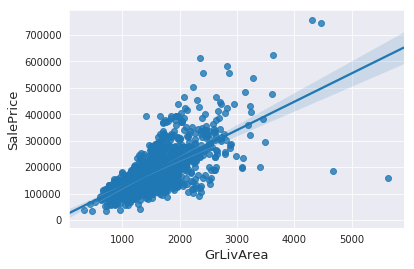

In [12]:
sns.set_style('darkgrid')
fig, ax = plt.subplots()
sns.regplot(train['GrLivArea'], train['SalePrice'])
#ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them

In [13]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


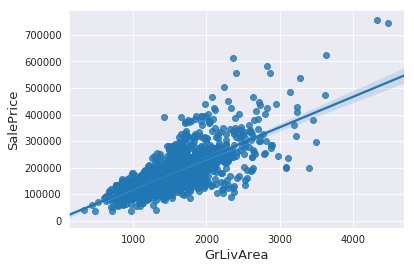

In [14]:
fig, ax = plt.subplots()
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

outliers has been removed

## Sales Price Tragert Variable

In [15]:
train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's have a look at the distribution of 'SalePrice' by plotting a simple histogram

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


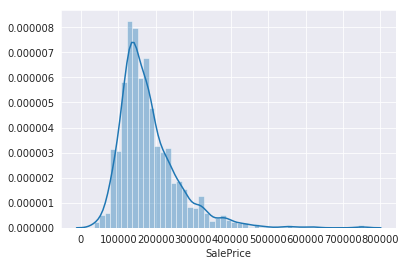

In [16]:
#PLot Histogram for 'SalePrice'
sns.distplot(train['SalePrice'])

#### Skewness: -
The term ‘skewness’ is used to mean the absence of symmetry from the mean of the dataset. 
Skewness is used to indicate the shape of the distribution of data.
In a skewed distribution, the curve is extended to either left or right side.
So, when the plot is extended towards the right side more, it denotes positive skewness.
On the other hand, when the plot is stretched more towards the left direction, then it is called as negative skewness.

#### Kurtosis:-
In statistics, kurtosis is defined as the parameter of relative sharpness of the peak of the probability distribution curve.
It is used to indicate the flatness or peakedness of the frequency distribution curve and measures the tails or outliers of the distribution.
Positive kurtosis represents that the distribution is more peaked than the normal distribution, 
whereas negative kurtosis shows that the distribution is less peaked than the normal distribution.

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

In [17]:
#Skewness & Kurtosis
print("Skewness : %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness : 1.881296
Kurtosis: 6.523067


((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976626, 180932.91906721535, 0.9320154492892366))

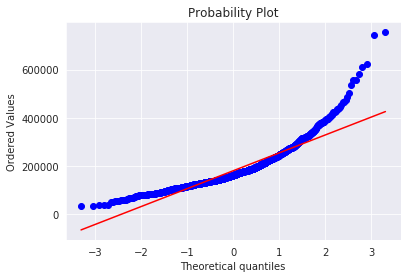

In [18]:
#PLot Histogram for 'SalePrice'
stats.probplot(train['SalePrice'], plot=plt)

Mu : 12.02
Sigma : 0.40


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


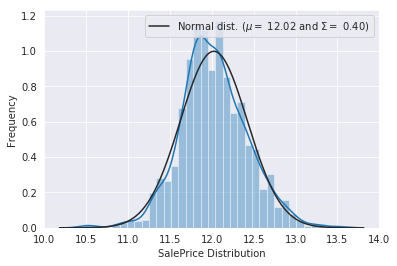

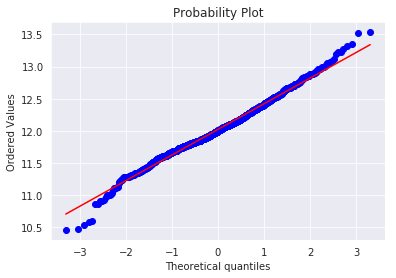

In [19]:
train['SalePrice'] = np.log1p(train['SalePrice'])

#Normal Distribution of New Sales Price
mu, sigma = norm.fit(train['SalePrice'])
print("Mu : {:.2f}\nSigma : {:.2f}".format(mu,sigma))

#Visualization
sns.distplot(train['SalePrice'],fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\Sigma=$ {:.2f})'.format(mu,sigma)],loc = 'best')
plt.xlabel('SalePrice Distribution')
plt.ylabel('Frequency')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

Let's Concatenate train & test data



In [20]:
train_n = train.shape[0]
test_n = test.shape[0]
y_train = train.SalePrice.values
y_test = train['SalePrice']
all_data = pd.concat((train,test),sort=False).reset_index(drop = True)
all_data.drop(['SalePrice'], axis=1, inplace = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


#### Misssing Data

In [21]:
all_data.isnull().sum().sort_values(ascending=False)



PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior1st         1
SaleType            1
                 ... 
YearRemodAdd        0
YearBuilt           0
SaleCondition       0
HeatingQC           0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [22]:
all_data_na_values = all_data.isnull().sum()
all_data_na_values = all_data_na_values.drop(all_data_na_values[all_data_na_values == 0].index).sort_values(ascending=False)[:30]
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na,'Missing Values' :all_data_na_values})
missing_data.head(20)

,Missing Ratio,Missing Values
PoolQC,99.691464,2908
MiscFeature,96.400411,2812
Alley,93.212204,2719
Fence,80.425094,2346
FireplaceQu,48.680151,1420
LotFrontage,16.660953,486
GarageFinish,5.450806,159
GarageYrBlt,5.450806,159
GarageQual,5.450806,159
GarageCond,5.450806,159


Text(0.5,1,'% of Misssing data by Features')

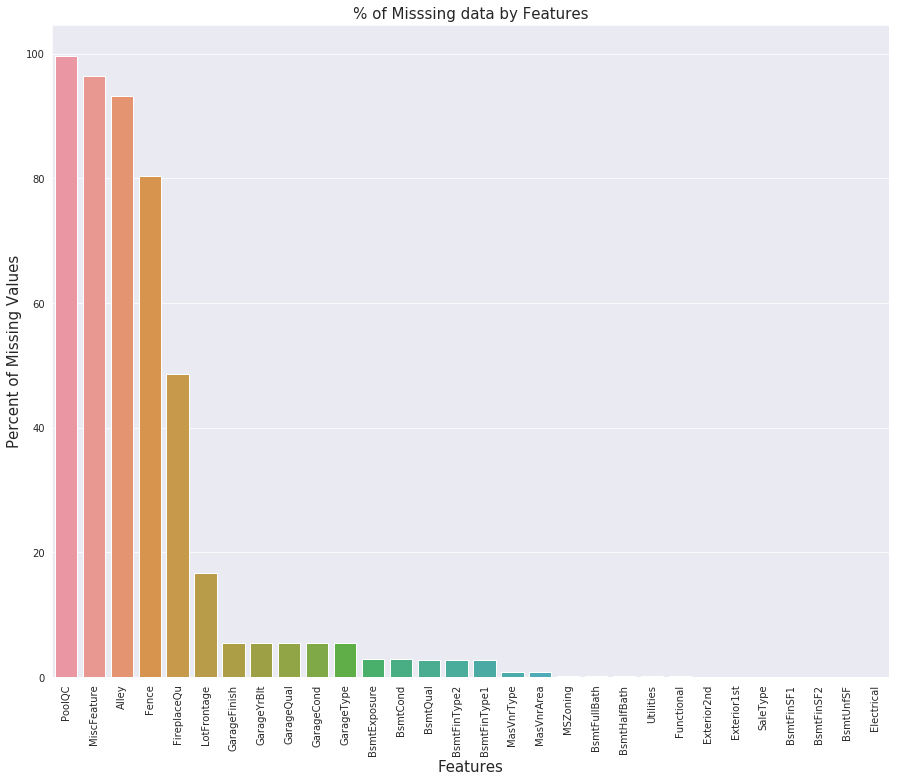

In [23]:
plt.subplots(figsize = (15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of Missing Values', fontsize=15)
plt.title('% of Misssing data by Features', fontsize=15)



### Correlation between Columns

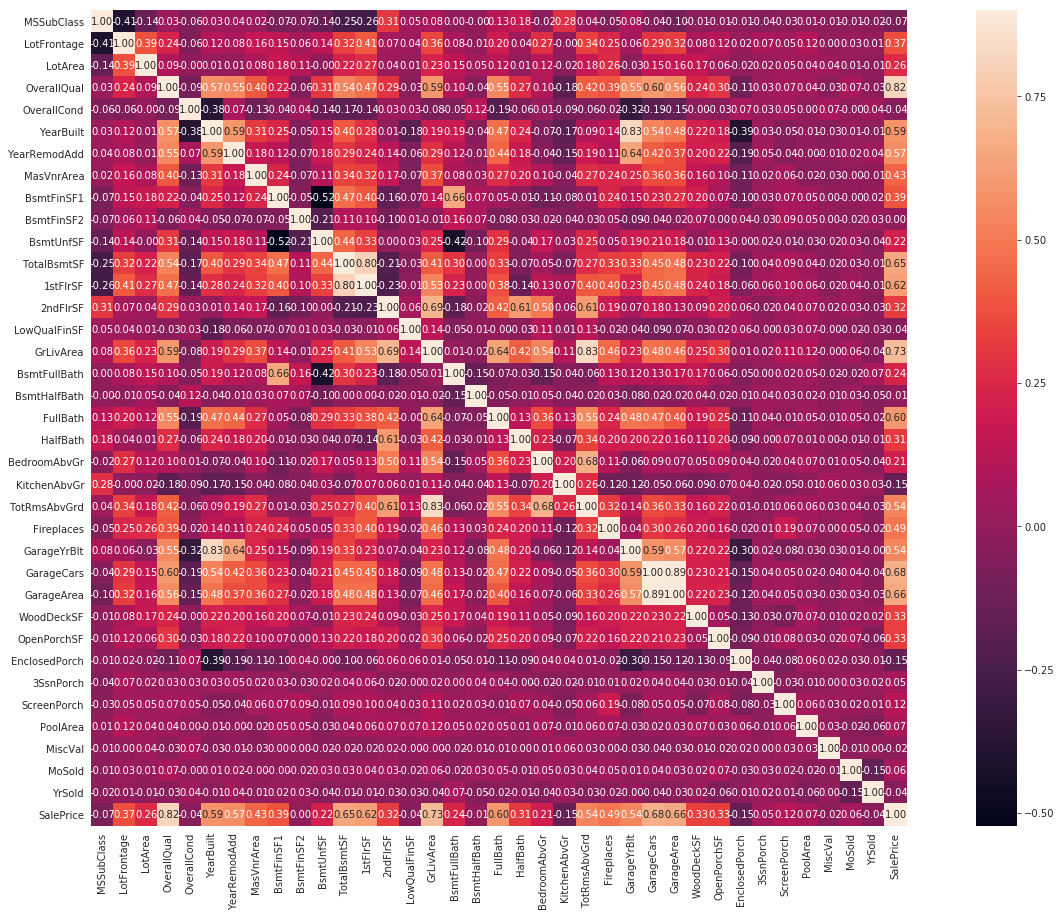

In [24]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt=".2f")

### Fill The Missing Data

In [25]:
# Fill the Missing Values
all_data['PoolQC'] = all_data['PoolQC'].fillna("None")
all_data['MiscFeature'] = all_data['MiscFeature'].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1'):
    all_data[col] = all_data[col].fillna('None')

for col in ('BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1'):
    all_data[col] = all_data[col].fillna(0)

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


Checking for any Remaining Missing Data

In [26]:
all_data_na_values = all_data.isnull().sum()
all_data_na_values = all_data_na_values.drop(all_data_na_values[all_data_na_values == 0].index).sort_values(ascending=False)[:30]
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na,'Missing Values' :all_data_na_values,'Data_type':all_data_na.dtype})
missing_data.head()


,Missing Ratio,Missing Values,Data_type


Since there is no missing data 

### More Feature Engineering

#### Transforming some numerical variables that are really categorical

In [27]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [29]:
#Adding Total sqfoot feature
all_data['TotalSF'] = all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']


In [30]:
from scipy.stats import skew
num = all_data.dtypes[all_data.dtypes != 'object'].index

#Skew all the Numerical Features
skew_feat = all_data[num].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

sk = pd.DataFrame({'Skewness' :skew_feat})
sk.head(10)

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### Getting dummy categorical features

In [31]:
#should/need to define categorical columns list
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [32]:
train_new = all_data[:train_n]
test_new = all_data[train_n:]
print(train_new.shape)
print(test_new.shape)

(1458, 220)
(1459, 220)


In [ ]:
 
import xgboost as xgb

regr = xgb.XGBRegressor(colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.1,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

regr.fit(train_new,y_train)

y_pred = regr.predict(train_new)
y_test = train['SalePrice']

from sklearn.metrics import mean_squared_error
print("XGB Score :",(np.sqrt(mean_squared_error(y_test, y_pred))))

y_pred_xgb = regr.predict(test_new)

y_pred_xgb = np.exp(y_pred_xgb)

pred_df = pd.DataFrame(y_pred_xgb, index=test_ID, columns=["SalePrice"])
pred_df.to_csv('submission1.csv', header=True, index_label='Id')

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
model_lasso =Lasso(alpha=0.0005,normalize=True, max_iter=1e5)
model_lasso.fit(train_new,y_train)
y_pred_lasso = model_lasso.predict(train_new)
score_lasso = np.sqrt(mean_squared_error(y_train, y_pred_lasso))
print("Lasso Score :",score_lasso)

y_pred_lasso_test = model_lasso.predict(test_new)
y_pred_lasso_test = np.exp(y_pred_lasso_test)

Lasso Score : 0.12673957798359145


In [35]:
model_rd = Ridge(alpha = 4.84)
model_rd.fit(train_new,y_train)
y_pred_rd = model_rd.predict(train_new)
score_rd = np.sqrt(mean_squared_error(y_train, y_pred_rd))
print("Ridge Score :",score_rd)

y_pred_rd_test = model_rd.predict(test_new)
y_pred_rd_test = np.exp(y_pred_rd_test)

Ridge Score : 0.09819705894772847


In [36]:
model_enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
model_enet.fit(train_new,y_train)
y_pred_enet = model_enet.predict(train_new)
score_enet = np.sqrt(mean_squared_error(y_train, y_pred_enet))
print("ElasticNet Score :",score_enet)

y_pred_enet_test = model_enet.predict(test_new)
y_pred_enet_test = np.exp(y_pred_enet_test)

ElasticNet Score : 0.10172015870931864


In [37]:
model_rf = RandomForestRegressor(n_estimators = 12,max_depth = 3,n_jobs = -1)
model_rf.fit(train_new,y_train)
y_pred_rf = model_rf.predict(train_new)
score_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf))
print("RandomForest Score :",score_rf)

y_pred_rf_test = model_rf.predict(test_new)
y_pred_rf_test = np.exp(y_pred_rf_test)

RandomForest Score : 0.1754194065507292


In [38]:
model_gb = GradientBoostingRegressor(n_estimators = 40,max_depth = 2)
model_gb.fit(train_new,y_train)
y_pred_gb = model_gb.predict(train_new)
score_gb = np.sqrt(mean_squared_error(y_train, y_pred_gb))
print("GradientBoosting Score :",score_gb)

y_pred_gb_test = model_gb.predict(test_new)
y_pred_gb_test = np.exp(y_pred_gb_test)

GradientBoosting Score : 0.13079046381054646


In [39]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
model_ad = AdaBoostRegressor(dt, learning_rate = 0.1, n_estimators=300,random_state= None)
model_ad.fit(train_new,y_train)
y_pred_ad = model_ad.predict(train_new)
score_ad = np.sqrt(mean_squared_error(y_train, y_pred_ad))
print("AdaBoost Model :",score_ad)

y_pred_ad_test = model_ad.predict(test_new)
y_pred_ad_test = np.exp(y_pred_ad_test)

AdaBoost Model : 0.11976068676083647
